In [2]:
from sklearn.svm import SVC

In [3]:
import pickle
with open('Censo.pkl', 'rb') as f:
  x_treinamento, y_treinamento, x_teste, y_teste = pickle.load(f)

In [4]:
x_treinamento.shape, y_treinamento.shape

((27676, 108), (27676,))

In [5]:
x_teste.shape, y_teste.shape

((4885, 108), (4885,))

In [23]:
svm_censo = SVC(kernel='linear',random_state=1)
# SVC Kernel Linear (85.0%) C = 1
# SVC Kernel Poly (82.9%) C = 1
# SVC Kernel Sigmoid (82.1%) C = 1
# SVC Kernel RBF (84.9%) C = 1
svm_censo.fit(x_treinamento, y_treinamento)

SVC(kernel='linear', random_state=1)

In [24]:
previsoes = svm_censo.predict(x_teste)

In [8]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [9]:
y_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [25]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_teste, previsoes)

0.8507676560900717

0.8507676560900717

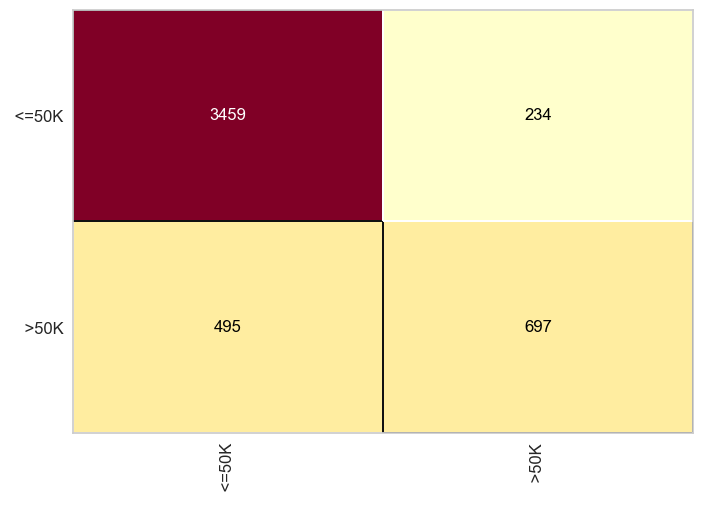

In [26]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(svm_censo)
cm.fit(x_treinamento, y_treinamento)
cm.score(x_teste, y_teste)

In [27]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90      3693
        >50K       0.75      0.58      0.66      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.76      0.78      4885
weighted avg       0.84      0.85      0.84      4885

